In [1]:
from pyspark import SparkConf, SparkContext
import sys


#Create a configuration object and
#set the name of the application
conf = SparkConf().setAppName("Spark Word Count")
# Create a Spark Context object
sc = SparkContext.getOrCreate(conf=conf)

In [2]:
folderPath = "../covid_cases_jrc.csv"
colnames = ['Date','iso3','CountryName','Region','lat','lon','CumulativePositive','CumulativeDeceased','CumulativeRecovered','CurrentlyPositive','Hospitalized','IntensiveCare','EUcountry','EUCPMcountry','NUTS']

In [3]:
logFileRDD = sc.textFile(folderPath)

In [4]:
from  mapred_utils import CovidData

def map0(row):
    row_data = row.split(",")
    date = row_data[0]
    nuts = row_data[-1]
    # avoid mapping the header
    if "CumulativePositive" not in row:
        return nuts, (date, CovidData.parse(row))
    return None
def reduce0(item1, item2):
    date1, covid1 = item1
    date2, covid2 = item2
    
    if date1 >= date2:
        return date1, CovidData.time_aggregate(covid1, covid2)
    else:
        return date2, CovidData.time_aggregate(covid1, covid2)

    
def map1(item):
    nuts, (date, covid_data) = item
    #row_data = row.split(",")
    #date = row_data[0]
    #nuts = row_data[-1]
    
    if len(nuts)> 4:
        nuts = nuts[:4]
    return nuts, covid_data
    
def reduce1(covid1, covid2):
    return CovidData.aggregate(covid1, covid2)

res = logFileRDD.map(map0).filter(lambda item: item is not None).map(lambda x: (x[0], [x[1]] ) )\
        .filter(lambda item: len(item[0]) >= 4 )\
        .reduceByKey(lambda x1,x2: x1 + x2)\
        .filter(lambda item: item is not None)\
        .filter(lambda item: len(item[0]) ==4 )\
        .collect()

In [5]:

res =logFileRDD.map(map0).filter(lambda item: item is not None).map(lambda x: (x[0], [x[1][1]] ) )\
        .filter(lambda item: len(item[0]) >= 4 )\
        .reduceByKey(lambda x1,x2: x1 + x2)\
        .filter(lambda item: item is not None)\
        .filter(lambda item: len(item[0]) ==4 )\
        .collect()

In [6]:
from  mapred_utils import CovidData
lomb_nuts,lomb_data = res[0]
acc = lomb_data[0]

for item in lomb_data[1:]:
    acc = CovidData.time_aggregate(acc, item)

get1:  3.0
get2:  20.0
nan
nan
nan

get1:  20.0
get2:  54.0
nan
nan
nan

get1:  54.0
get2:  116.0
nan
nan
nan

get1:  116.0
get2:  172.0
nan
6.0
get1:  0.0
get2:  6.0
6.0

get1:  0.0
get2:  0.0
get1:  172.0
get2:  240.0
6.0
9.0
get1:  6.0
get2:  9.0
9.0

get1:  0.0
get2:  nan
get1:  240.0
get2:  258.0
9.0
9.0
get1:  9.0
get2:  9.0
9.0

get1:  0.0
get2:  0.0
get1:  258.0
get2:  403.0
9.0
14.0
get1:  9.0
get2:  14.0
14.0

get1:  0.0
get2:  40.0
get1:  403.0
get2:  531.0
14.0
17.0
get1:  14.0
get2:  17.0
17.0

get1:  40.0
get2:  40.0
get1:  531.0
get2:  615.0
17.0
23.0
get1:  17.0
get2:  23.0
23.0

get1:  40.0
get2:  40.0
get1:  615.0
get2:  984.0
23.0
24.0
get1:  23.0
get2:  24.0
24.0

get1:  40.0
get2:  73.0
get1:  984.0
get2:  1254.0
24.0
38.0
get1:  24.0
get2:  38.0
38.0

get1:  73.0
get2:  139.0
get1:  1254.0
get2:  1520.0
38.0
55.0
get1:  38.0
get2:  55.0
55.0

get1:  139.0
get2:  139.0
get1:  1520.0
get2:  1820.0
55.0
73.0
get1:  55.0
get2:  73.0
73.0

get1:  139.0
get2:  250.0
get

get2:  66175.0
get1:  93761.0
get2:  93839.0
16639.0
16640.0
get1:  16639.0
get2:  16640.0
16640.0

get1:  66175.0
get2:  66376.0
get1:  93839.0
get2:  93901.0
16640.0
16644.0
get1:  16640.0
get2:  16644.0
16644.0

get1:  66376.0
get2:  67197.0
get1:  93901.0
get2:  94010.0
16644.0
16650.0
get1:  16644.0
get2:  16650.0
16650.0

get1:  67197.0
get2:  67422.0
get1:  94010.0
get2:  94108.0
16650.0
16671.0
get1:  16650.0
get2:  16671.0
16671.0

get1:  67422.0
get2:  67610.0
get1:  94108.0
get2:  94223.0
16671.0
16675.0
get1:  16671.0
get2:  16675.0
16675.0

get1:  67610.0
get2:  67871.0
get1:  94223.0
get2:  94318.0
16675.0
16691.0
get1:  16675.0
get2:  16691.0
16691.0

get1:  67871.0
get2:  68201.0
get1:  94318.0
get2:  94416.0
16691.0
16697.0
get1:  16691.0
get2:  16697.0
16697.0

get1:  68201.0
get2:  68274.0
get1:  94416.0
get2:  94527.0
16697.0
16700.0
get1:  16697.0
get2:  16700.0
16700.0

get1:  68274.0
get2:  68335.0
get1:  94527.0
get2:  94580.0
16700.0
16713.0
get1:  16700.0
get2

get1:  265531.0
get2:  276486.0
18442.0
18571.0
get1:  18442.0
get2:  18571.0
18571.0

get1:  115630.0
get2:  122410.0
get1:  276486.0
get2:  284666.0
18571.0
18723.0
get1:  18571.0
get2:  18723.0
18723.0

get1:  122410.0
get2:  124025.0
get1:  284666.0
get2:  293957.0
18723.0
18910.0
get1:  18723.0
get2:  18910.0
18910.0

get1:  124025.0
get2:  132254.0
get1:  293957.0
get2:  304591.0
18910.0
19028.0
get1:  18910.0
get2:  19028.0
19028.0

get1:  132254.0
get2:  134294.0
get1:  304591.0
get2:  312720.0
19028.0
19186.0
get1:  19028.0
get2:  19186.0
19186.0

get1:  134294.0
get2:  137255.0
get1:  312720.0
get2:  320780.0
19186.0
19367.0
get1:  19186.0
get2:  19367.0
19367.0

get1:  137255.0
get2:  138872.0
get1:  320780.0
get2:  324908.0
19367.0
19466.0
get1:  19367.0
get2:  19466.0
19466.0

get1:  138872.0
get2:  153103.0
get1:  324908.0
get2:  333356.0
19466.0
19668.0
get1:  19466.0
get2:  19668.0
19668.0

get1:  153103.0
get2:  157121.0
get1:  333356.0
get2:  340989.0
19668.0
19850.0


get1:  29799.0
get2:  29876.0
29876.0

get1:  562346.0
get2:  571586.0
get1:  700025.0
get2:  703668.0
29876.0
29975.0
get1:  29876.0
get2:  29975.0
29975.0

get1:  571586.0
get2:  575437.0
get1:  703668.0
get2:  707950.0
29975.0
30085.0
get1:  29975.0
get2:  30085.0
30085.0

get1:  575437.0
get2:  577693.0
get1:  707950.0
get2:  712996.0
30085.0
30185.0
get1:  30085.0
get2:  30185.0
30185.0

get1:  577693.0
get2:  580733.0
get1:  712996.0
get2:  718073.0
30185.0
30285.0
get1:  30185.0
get2:  30285.0
30285.0

get1:  580733.0
get2:  583133.0
get1:  718073.0
get2:  722957.0
30285.0
30387.0
get1:  30285.0
get2:  30387.0
30387.0

get1:  583133.0
get2:  585943.0
get1:  722957.0
get2:  726477.0
30387.0
30462.0
get1:  30387.0
get2:  30462.0
30462.0

get1:  585943.0
get2:  593324.0
get1:  726477.0
get2:  728270.0
30462.0
30550.0
get1:  30462.0
get2:  30550.0
30550.0

get1:  593324.0
get2:  601915.0
get1:  728270.0
get2:  731541.0
30550.0
30635.0
get1:  30550.0
get2:  30635.0
30635.0

get1:  60

33836.0

In [7]:
acc.as_row(lomb_nuts)

'ITC4,856667.0,33836.0,810376.0,12455.0,283.0,35.0,ITA,Italy,True,True,2021-08-06'

(array([], dtype=int64),)

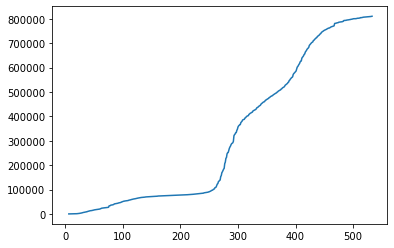

In [32]:
import numpy as np
lomb = res[0]

cum_pos = np.array([ item.cum_positive for data, item in lomb[1] ])
cum_dec = np.array([ item.cum_deceased for data, item in lomb[1] ])
cum_rec = np.array([ item.cum_recovered for data, item in lomb[1] ])
import matplotlib.pyplot as plt
plt.plot(cum_rec)
np.where(cum_rec == np.nan)

In [42]:
logFileRDD.map(map0).filter(lambda item: item is not None).map(lambda x: (x[0], x[1][1] ) )\
        .filter(lambda item: len(item[0]) >= 4 )\
        .reduceByKey(lambda i1,i2: CovidData.time_aggregate(i1,i2))\
        .map(lambda item: (item[0], item[1].cum_deceased))\
        .collect()

[('ITC4', nan),
 ('ITH3', nan),
 ('ITH5', nan),
 ('ITH1', nan),
 ('ITG1', nan),
 ('AT11', 331.0),
 ('AT22', 2096.0),
 ('AT33', 689.0),
 ('AT13', 2369.0),
 ('CH056', 192.0),
 ('ITF1', 2515.0),
 ('ITF4', 6672.0),
 ('CH031', 208.0),
 ('CH025', 147.0),
 ('CH040', 1420.0),
 ('FRH0', 1671.0),
 ('ITF6', 1265.0),
 ('CH032', 220.0),
 ('CH011', 1018.0),
 ('ES70', nan),
 ('ES41', nan),
 ('ES51', nan),
 ('ES30', nan),
 ('ES53', nan),
 ('CH066', 123.0),
 ('ITH4', 3799.0),
 ('NL13', nan),
 ('ES52', nan),
 ('ES43', nan),
 ('ES23', nan),
 ('ITF2', 492.0),
 ('ITG2', 1511.0),
 ('ITH2', 1363.0),
 ('PT17', nan),
 ('ES24', 3607.0),
 ('ES11', 2468.0),
 ('CH061', 335.0),
 ('FRM0', 208.0),
 ('FRY3', 186.0),
 ('NL42', nan),
 ('NL21', nan),
 ('SK010', 0.0),
 ('NL34', nan),
 ('PT15', nan),
 ('SK042', 0.0),
 ('NO053', 0.0),
 ('NO072', 0.0),
 ('NO033', 0.0),
 ('NO05', 0.0),
 ('NO012', 0.0),
 ('HR041', 2544.0),
 ('HR031', 501.0),
 ('FRY4', 300.0),
 ('SE221', nan),
 ('SE213', nan),
 ('SE124', nan),
 ('SE224', nan),


In [45]:
logFileRDD.map(map0).filter(lambda item: item is not None).map(lambda x: (x[0], x[1][1] ) )\
        .filter(lambda item: len(item[0]) >= 4 )\
        .collect()

[('CH013', <mapred_utils.CovidData at 0x2c9f4584f70>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4584340>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277730>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277fa0>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f42771f0>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277c10>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f42772b0>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277ee0>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f42775b0>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277f10>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277f40>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277a00>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f42777c0>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277160>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277250>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277d60>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f42775e0>),
 ('CH013', <mapred_utils.CovidData at 0x2c9f4277670>),
 ('CH013',

In [43]:
max(1., np.nan)

1.0

In [ ]:
res[0][1].cum_deceased

In [ ]:
import urllib.request

covid_data_url = "https://raw.githubusercontent.com/ec-jrc/COVID-19/master/data-by-region/jrc-covid-19-all-days-by-regions.csv"
    
with urllib.request.urlopen(covid_data_url) as f:
    string = f.read().decode('utf-8')
    
